<a href="https://colab.research.google.com/github/valerio-unifei/UNIFEI-IA-Aulas/blob/main/UNIFEI_GeoPandas_Traffic_Volume_Columbia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [22]:
import geopandas

#https://opendata.dc.gov/datasets/DCGIS::2019-traffic-volume/about
traffic = geopandas.read_file('https://opendata.arcgis.com/api/v3/datasets/e22369afb7e94cf3b9c6c1b60f4bb509_167/downloads/data?format=geojson&spatialRefId=4326')

traffic.head()

,OBJECTID,ROUTEID,FROMMEASURE,TOMEASURE,FROMDATE,TODATE,EVENTID,AADT,AADT_YEAR,LOCERROR,SHAPELEN,geometry
0,89780,11000102,0.000,70.739,2019-01-01T00:00:00+00:00,1970-01-01T00:00:00+00:00,{3D00302D-94E0-454E-A9B6-BE548C4072B3},3035.0,2019,NO ERROR,70.738604,"LINESTRING Z (-77.01252 38.88980 0.00000, -77...."
1,89781,11000102,70.740,210.433,2019-01-01T00:00:00+00:00,1970-01-01T00:00:00+00:00,{C72D3A93-7F40-4B5E-A39A-2686EE94D8CC},8970.0,2019,NO ERROR,139.693568,"LINESTRING Z (-77.01223 38.89084 0.00000, -77...."
2,89782,11000102,210.434,296.050,2019-01-01T00:00:00+00:00,1970-01-01T00:00:00+00:00,{C25BDE05-84AF-4741-B296-00B7A9C0AE10},8970.0,2019,NO ERROR,85.616808,"LINESTRING Z (-77.01218 38.89209 0.00000, -77...."
3,89783,11000102,296.051,326.481,2019-01-01T00:00:00+00:00,1970-01-01T00:00:00+00:00,{DA8247E4-D1C3-4AE6-B2D4-C5BFBBE45541},7589.0,2019,NO ERROR,30.430600,"LINESTRING Z (-77.01217 38.89287 0.00000, -77...."
4,89784,11000102,326.481,371.738,2019-01-01T00:00:00+00:00,1970-01-01T00:00:00+00:00,{794CD86C-F824-41C3-934E-DA50AFEC1387},7589.0,2019,NO ERROR,45.256877,"LINESTRING Z (-77.01217 38.89314 0.00000, -77...."


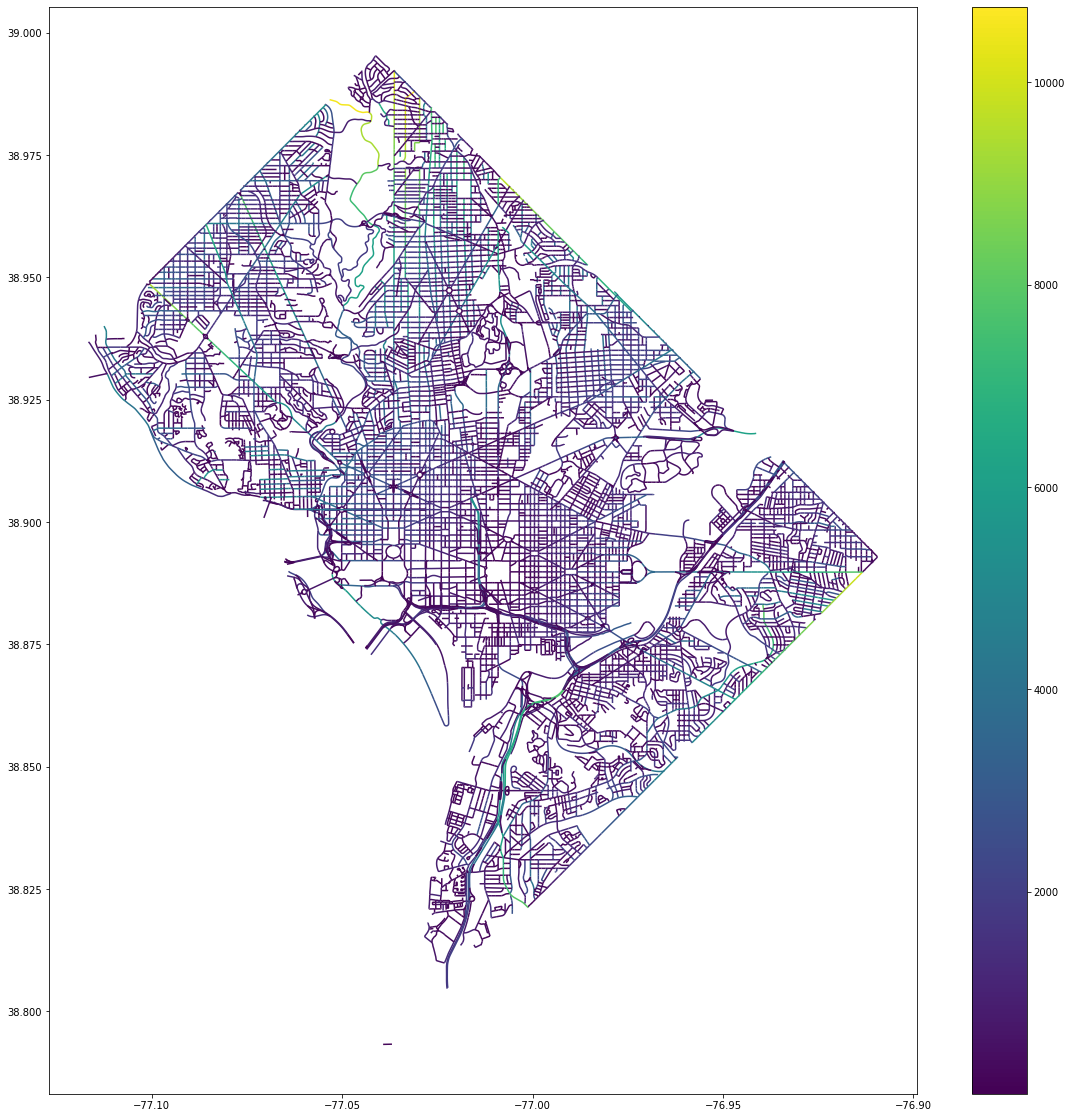

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,20]

fig, ax = plt.subplots(1, 1)
traffic.plot(column='TOMEASURE', ax=ax, legend=True)

In [27]:
# https://roads-waterways.transport.nsw.gov.au/about/corporate-publications/statistics/traffic-volumes/aadt-map/index.html#/?z=5&yr=2021&st=2
au = geopandas.read_file('https://rms-uat.cartodb.com/api/v2/sql?format=GeoJSON&filename=Traffic%20Volume%20Viewer%20-%20Data%20for%20All%20Years&q=SELECT%20A.station_id,%20B.road_name,%20B.suburb,%20A.cardinal_direction_name,%20A.classification_type,%20A.year,%20A.period,%20A.traffic_count,%20B.wgs84_latitude,%20B.wgs84_longitude,%20ST_SetSRID(ST_MakePoint(CAST(B.wgs84_longitude%20AS%20FLOAT),%20CAST(B.wgs84_latitude%20AS%20FLOAT)),4326)%20AS%20the_geom%20FROM%20ds_aadt_summary_data%20AS%20A%20JOIN%20ds_aadt_reference%20AS%20B%20ON%20A.station_key%20=%20B.station_key%20WHERE%20A.publish=%271%27%20ORDER%20BY%20A.station_id,%20A.year,%20A.period,%20A.cardinal_direction_seq,%20A.classification_seq')
au.head()

,station_id,road_name,suburb,cardinal_direction_name,classification_type,year,period,traffic_count,wgs84_latitude,wgs84_longitude,geometry
0,01001,Bradfield Highway,Milsons Point,NORTH,ALL VEHICLES,2007,ALL DAYS,11741,-33.852116,151.210770,POINT (151.21077 -33.85212)
1,01001,Bradfield Highway,Milsons Point,NORTH,LIGHT VEHICLES,2007,ALL DAYS,9606,-33.852116,151.210770,POINT (151.21077 -33.85212)
2,01001,Bradfield Highway,Milsons Point,NORTH,HEAVY VEHICLES,2007,ALL DAYS,2135,-33.852116,151.210770,POINT (151.21077 -33.85212)
3,01001,Bradfield Highway,Milsons Point,SOUTH,ALL VEHICLES,2007,ALL DAYS,10743,-33.852116,151.210770,POINT (151.21077 -33.85212)
4,01001,Bradfield Highway,Milsons Point,SOUTH,LIGHT VEHICLES,2007,ALL DAYS,8609,-33.852116,151.210770,POINT (151.21077 -33.85212)


In [33]:
au2008 = au.loc[au['year'] == '2008']
au2008.head()

,station_id,road_name,suburb,cardinal_direction_name,classification_type,year,period,traffic_count,wgs84_latitude,wgs84_longitude,geometry
96,01003,Sydney Harbour Tunnel,Sydney,NORTH,UNCLASSIFIED,2008,ALL DAYS,44044,-33.860836,151.213791,POINT (151.21379 -33.86084)
97,01003,Sydney Harbour Tunnel,Sydney,SOUTH,UNCLASSIFIED,2008,ALL DAYS,39252,-33.860836,151.213791,POINT (151.21379 -33.86084)
98,01003,Sydney Harbour Tunnel,Sydney,NORTHBOUND AND SOUTHBOUND,UNCLASSIFIED,2008,ALL DAYS,83296,-33.860836,151.213791,POINT (151.21379 -33.86084)
99,01003,Sydney Harbour Tunnel,Sydney,NORTH,UNCLASSIFIED,2008,AM PEAK,12476,-33.860836,151.213791,POINT (151.21379 -33.86084)
100,01003,Sydney Harbour Tunnel,Sydney,SOUTH,UNCLASSIFIED,2008,AM PEAK,12980,-33.860836,151.213791,POINT (151.21379 -33.86084)


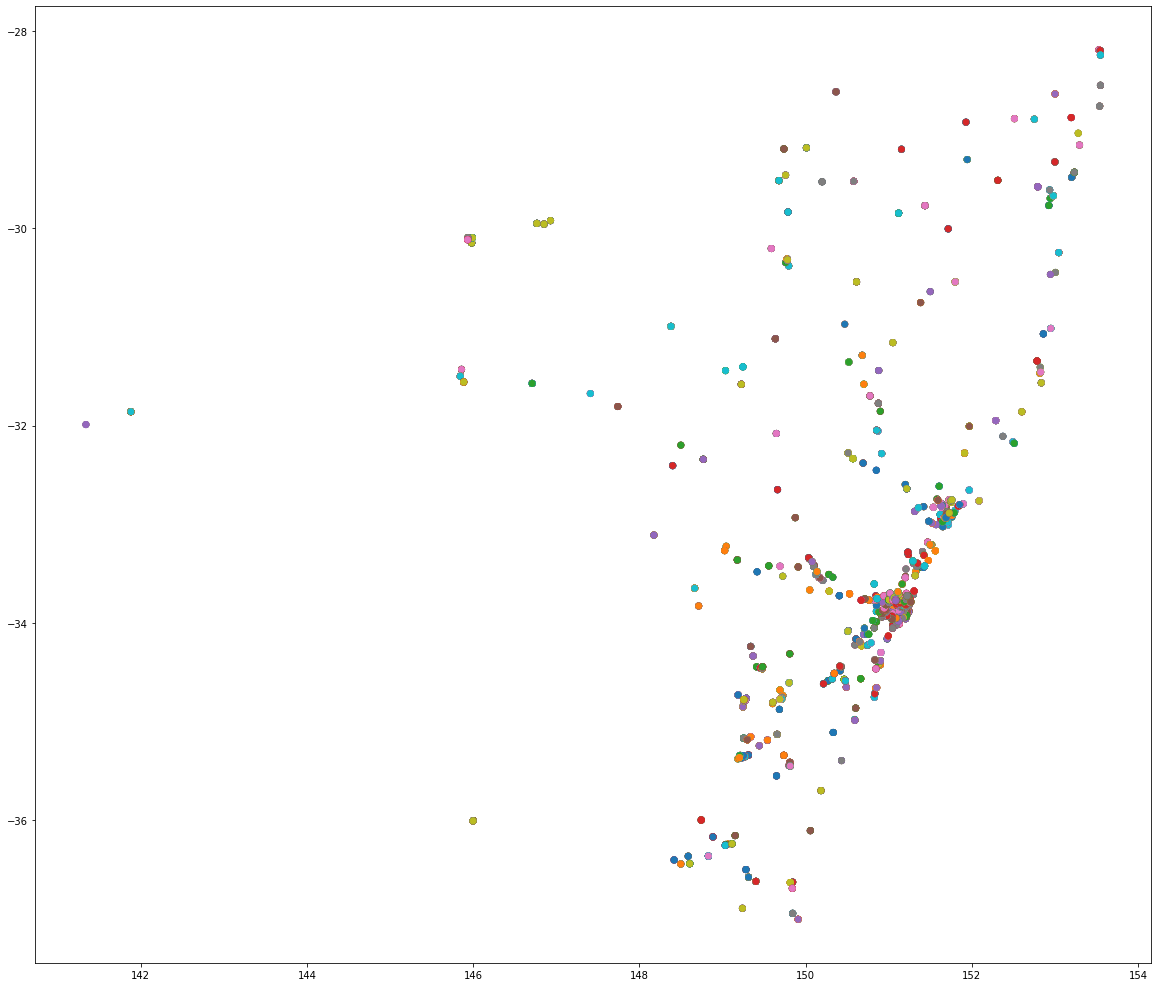

In [40]:
au2008.plot(column='traffic_count')

In [41]:
traf_columbia = {
    2010:'https://opendata.arcgis.com/api/v3/datasets/49e62fbe93ee4c8bbc4a876f3cf93b37_124/downloads/data?format=geojson&spatialRefId=4326',
    2011:'https://opendata.arcgis.com/api/v3/datasets/2102cb84263e448682df872d595d1f08_125/downloads/data?format=geojson&spatialRefId=4326',
    2012:'https://opendata.arcgis.com/api/v3/datasets/ae78500807964d93be817f52b5f523cf_126/downloads/data?format=geojson&spatialRefId=4326',
    2013:'https://opendata.arcgis.com/api/v3/datasets/c72b4996a2bf40ab86197e2f92246f00_127/downloads/data?format=geojson&spatialRefId=4326',
    2014:'https://opendata.arcgis.com/api/v3/datasets/48e9f41f5e1f48fd98451b423b4f3dd0_128/downloads/data?format=geojson&spatialRefId=4326',
    2015:'https://opendata.arcgis.com/api/v3/datasets/50d9973f770e410c888b31a19a777cf3_129/downloads/data?format=geojson&spatialRefId=4326',
    2016:'https://opendata.arcgis.com/api/v3/datasets/0162d6516abb4bb48ce3b171dac583e5_130/downloads/data?format=geojson&spatialRefId=4326',
    2017:'https://opendata.arcgis.com/api/v3/datasets/c99b831e72c8453085941eccc1507ba5_134/downloads/data?format=geojson&spatialRefId=4326',
    2018:'https://opendata.arcgis.com/api/v3/datasets/3bdddc9f1a0640c99ff886292aa5b3c1_154/downloads/data?format=geojson&spatialRefId=4326',
    2019:'https://opendata.arcgis.com/api/v3/datasets/e22369afb7e94cf3b9c6c1b60f4bb509_167/downloads/data?format=geojson&spatialRefId=4326',
    }

In [59]:
trafegos =[]
anos = []
for ano, url in traf_columbia.items():
  tc = geopandas.read_file(url)
  print(ano, tc.columns)
  anos.append(ano)
  trafegos.append(tc)

2010 Index(['OBJECTID', 'SSRSEGID', 'SOURCESEGID', 'SOURCEID', 'QUADCODE',
       'ROADTYPE', 'STREETID', 'SEGMENTTYPE', 'FROMNODEID', 'TONODEID',
       'STARTMEASURE', 'ENDMEASURE', 'LIFECYCLESTATUS', 'DIRECTIONALITY',
       'OWNERSHIP', 'REGISTEREDNAME', 'STREETTYPE', 'QUADRANT',
       'FROMADDRESSLEFT', 'TOADDRESSLEFT', 'FROMADDRESSRIGHT',
       'TOADDRESSRIGHT', 'DESCRIPTION', 'INSERVICEDATE', 'OUTOFSERVICE',
       'UPDATETIME', 'FROMGRADE', 'TOGRADE', 'HPMSID', 'AADT2010', 'SOURCE10',
       'SHAPELEN', 'geometry'],
      dtype='object')
2011 Index(['OBJECTID', 'SSRSEGID', 'SOURCESEGID', 'SOURCEID', 'QUADCODE',
       'ROADTYPE', 'STREETID', 'SEGMENTTYPE', 'FROMNODEID', 'TONODEID',
       'STARTMEASURE', 'ENDMEASURE', 'LIFECYCLESTATUS', 'DIRECTIONALITY',
       'OWNERSHIP', 'REGISTEREDNAME', 'STREETTYPE', 'QUADRANT',
       'FROMADDRESSLEFT', 'TOADDRESSLEFT', 'FROMADDRESSRIGHT',
       'TOADDRESSRIGHT', 'DESCRIPTION', 'INSERVICEDATE', 'OUTOFSERVICE',
       'UPDATETIME', 'FRO

In [ ]:
import cv2

plt.rcParams['figure.figsize'] = [20,20]

imgs = []
for ano, tc in zip(anos, trafegos):

  if (ano>2015):
    tc.plot(column='TOMEASURE')
  else:
    tc.plot(column='ENDMEASURE')

  filename = 'trf'+str(ano)+'.jpg'
  plt.savefig(filename)

  imgs.append(cv2.imread(filename))
  print(filename)

In [61]:
height, width, layers = imgs[0].shape
size = (width,height)
print(size)

out = cv2.VideoWriter('traf_columbia.mp4',
                      cv2.VideoWriter_fourcc(*'DIVX')
                      , 15, 
                      size
                      )
for img in imgs:
  for i in range(10): # repete frame x vezes
    out.write(img)

out.release()

(1440, 1440)
